# 3 Classifiers and Metrics - Coding
## 3.1 Calculate the value of g(x) and choose the threshold to minimize misclassification error

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np

In [256]:
# creat a dataframe with features and labels
data = {'Age': [20, 18, 11, 31, 19, 21, 44, 15, 16, 17],
        'likeRowing': [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        'Experience': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
        'Income': [20, 33, 21, 18, 7, 10, 23, 16, 15, 6],
        'Y': [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]}
df = pd.DataFrame(data)


In [173]:
# define function g(x) and f(x)
theta = np.array([0.05, -3, 2.1, 0.008])
theta_0 = np.full([1, 10], 0.3)

def g(x):
    
    result = x @ theta.transpose() + theta_0
    
    return result.tolist()[0]


def tanh(x):
    
    result = (mt.exp(x) - mt.exp(-x))/(mt.exp(x) + mt.exp(-x))
    
    return result


def f(x):
    
    result = tanh(g(x))
    
    return result

In [257]:
# calculate g(x)
x = np.array(df.iloc[:, 0:4])
df1 = df
gx = g(x)
df1['g(x)'] = gx
df1
df1_sortby_g = df1.sort_values(by='g(x)', ascending=False)
df1_sortby_g.reset_index()

,index,Age,likeRowing,Experience,Income,Y,g(x)
0,8,16,0,1,15,1,3.320
1,2,11,0,1,21,1,3.118
2,3,31,0,0,18,1,1.994
3,1,18,1,1,33,0,0.564
4,4,19,1,1,7,1,0.406
5,7,15,1,1,16,0,0.278
6,6,44,1,0,23,1,-0.316
7,0,20,1,0,20,0,-1.540
8,5,21,1,0,10,0,-1.570
9,9,17,1,0,6,0,-1.802


In [206]:
# calculate misclassification error for each threshold
def MisClassificationError(df, classifier):  # Note: pass a string to 'classifier'
    
    df_sorted = df.sort_values(by=classifier, ascending=False)
    
    mis_errors = []
    f1scores = []
    precisions = []
    recalls = []
    N = df.shape[0]

    for idx in df_sorted.index:

        pred_1 = df_sorted['Y'].iloc[:idx+1]
        pred_0 = df_sorted['Y'].iloc[idx+1:]

        TP = sum(pred_1)
        FP = len(pred_1) - TP
        FN = sum(pred_0)
        TN = len(pred_0) - FN

        mis_error = (FP + FN) / N
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1score = 2 * (precision * recall) / (precision + recall)

        mis_errors.append(mis_error)
        f1scores.append(f1score)
        precisions.append(precision)
        recalls.append(recall)
        
    error_sort = np.sort(mis_errors)
    error_args = np.argsort(mis_errors)
    
    return error_sort, error_args


In [211]:
df = df1
classifier = 'g(x)'
g_min_err = MisClassificationError(df, classifier)
print('misclassification errors and index using g(x) as classifier:\n', g_min_err)
g_arg_min_err = g_min_err[1][:3]
thresholds_g = df1_sortby_g['g(x)'].iloc[g_arg_min_err+1]
print('thresholds that will achieve the minimum misclassification error:\n', thresholds_g)
print('minimum misclassification error:', np.min(g_min_err[0]))

misclassification errors and index using g(x) as classifier:
 (array([0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5]), array([1, 4, 6, 2, 3, 5, 8, 0, 7, 9]))
thresholds that will achieve the minimum misclassification error:
 3    1.994
7    0.278
0   -1.540
Name: g(x), dtype: float64
minimum misclassification error: 0.2


The thresholds (denote as T) that will achieve the minimum classification error are:  
$$
T = 1.994 \ or \ 0.278 \ or \ -1.540
$$
the minimum misclassification error is $\frac{FP+FN}{N} = \frac{2}{10}=0.2$

## 3.2 Calculate f(x), choose the threshold to minimize misclassification error, and compute its cofusion matrix, precision, recall and F1 score

In [258]:
df1['f(x)'] = df1['g(x)'].apply(tanh)
df1_sortby_f = df1.sort_values(by='f(x)', ascending=False)
df1_sortby_f

,Age,likeRowing,Experience,Income,Y,g(x),f(x)
8,16,0,1,15,1,3.320,0.997389
2,11,0,1,21,1,3.118,0.996092
3,31,0,0,18,1,1.994,0.963601
1,18,1,1,33,0,0.564,0.510939
4,19,1,1,7,1,0.406,0.385071
7,15,1,1,16,0,0.278,0.271053
6,44,1,0,23,1,-0.316,-0.305886
0,20,1,0,20,0,-1.540,-0.912120
5,21,1,0,10,0,-1.570,-0.917026
9,17,1,0,6,0,-1.802,-0.947013


In [212]:
df = df1
classifier = 'f(x)'
f_min_err = MisClassificationError(df, classifier)
print('misclassification errors and index using f(x) as classifier:\n', f_min_err)
f_arg_min_err = f_min_err[1][:3]
thresholds_f = df1_sortby_f['f(x)'].iloc[f_arg_min_err+1]
print('thresholds that will achieve the minimum misclassification error:\n', thresholds_f)
print('minimum misclassification error:', np.min(f_min_err[0]))

misclassification errors and index using f(x) as classifier:
 (array([0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5]), array([1, 4, 6, 2, 3, 5, 8, 0, 7, 9]))
thresholds that will achieve the minimum misclassification error:
 3    0.963601
7    0.271053
0   -0.912120
Name: f(x), dtype: float64
minimum misclassification error: 0.2


The thresholds (denote as T) that will minimize the classification error are:  
$$
T = 0.9636 \ or \ 0.2720 \ or \ -0.9121
$$
the minimum misclassification error is $\frac{FP+FN}{N} = \frac{2}{10}=0.2$

Take $T = 0.9636$ as an example.  
$$TP=3,\ TN=5,\ FP=0,\ FN=2$$
Confusion matrix:    
   
|         | $y=1$   |   $y=0$  |
| :--------:  | :-----: | :-----: |
| $\hat{y}=1$  |  3     |   0    |
| $\hat{y}=0$ |  2     |  5     |

$$
Precision = \frac{TP}{predicted positive} = 1 \\
Recall = \frac{TP}{Positive} = \frac{3}{5} \\
F1score = 2\frac{Precision * Recall}{Precision + Recall}= \frac{3}{4}
$$

## 3.3 Plot ROC curve of f(x) and the points that represent decision points with the minimum classification error.

[0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.8, 1.0]


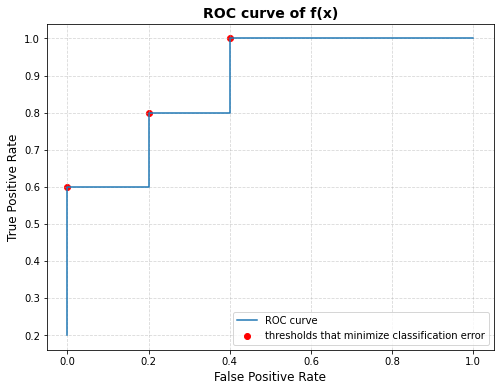

In [260]:
df_sorty_reindex = df1_sortby_f.reset_index()

TPR_list = []
FPR_list = []
pos = neg = 5
for i in list(df_sorty_reindex.index):
    
    TP = sum(df_sorty_reindex['Y'].iloc[:i+1])  
    FP = i + 1 - TP
    TPR = TP / pos
    FPR = FP / neg
    TPR_list.append(TPR)
    FPR_list.append(FPR)
    

print(TPR_list)
print(FPR_list)


plt.figure(figsize=(8,6))
plt.plot(FPR_list, TPR_list);
plt.grid(True, linestyle='--', alpha = .5)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curve of f(x)', fontsize=14, fontweight='bold')

# plot the thresholds
fpr_threshold = [0, 0.2, 0.4]
tpr_threshold = [0.6, 0.8, 1]
plt.scatter(fpr_threshold, tpr_threshold, c='r') 
plt.legend(['ROC curve','thresholds that minimize classification error'])
    

# 5 Classification with KNN and Decision Tree
## 5.2 Use two decision tree packages, report F1 score and tune parameter with K-fold cross validation

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [53]:
df_train = pd.read_csv(
    '/Users/shaoyutong/Library/Mobile Documents/com~apple~CloudDocs/CS671-ML/HW/NEW-HW1/carseats_train.csv')
df_test = pd.read_csv(
    '/Users/shaoyutong/Library/Mobile Documents/com~apple~CloudDocs/CS671-ML/HW/NEW-HW1/carseats_test.csv')

In [54]:
df_train.head()
df_train1 = df_train.copy()

## encoding

In [57]:
# data preprocessing--encoding strings with binary variables
# encoding ShelveLoc
encoder = OneHotEncoder(handle_unknown='ignore')
sl_train = np.array(df_train['ShelveLoc']).reshape(-1,1)
sl_test = np.array(df_test['ShelveLoc']).reshape(-1,1)
encoder.fit(sl_train)
encoder.categories_
df_train[['sl_bad','sl_good','sl_medium']]=encoder.transform(sl_train).toarray()
df_test[['sl_bad','sl_good','sl_medium']]=encoder.transform(sl_test).toarray()

# encoding Urban, US
urban_train = pd.get_dummies(df_train['Urban'], prefix='urban')
urban_train.head()
urban_test = pd.get_dummies(df_test['Urban'], prefix='urban')

US_train = pd.get_dummies(df_train['US'], prefix='us')
US_train.head()
US_test = pd.get_dummies(df_test['US'], prefix='us')

In [222]:
us_urban_train = pd.merge(urban_train, US_train, left_index=True, right_index=True)
train = pd.merge(df_train, us_urban_train, left_index=True, right_index=True)
train1 = train.drop(columns=['ShelveLoc','US','Urban'])
train1
us_urban_test = pd.merge(urban_test, US_test, left_index=True, right_index=True)
test = pd.merge(df_test, us_urban_test, left_index=True, right_index=True)
test1 = test.drop(columns=['ShelveLoc','US','Urban'])
test1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,sl_bad,sl_good,sl_medium,urban_No,urban_Yes,us_No,us_Yes
0,0,117,100,4,466,97,55,14,0.0,0.0,1.0,0,1,0,1
1,0,141,64,3,340,128,38,13,1.0,0.0,0.0,0,1,1,0
2,0,115,105,0,45,108,71,15,0.0,0.0,1.0,0,1,1,0
3,1,136,81,15,425,120,67,10,0.0,1.0,0.0,0,1,0,1
4,1,107,117,11,148,118,52,18,0.0,1.0,0.0,0,1,0,1


## 1. Decision Tree Classifier

In [ ]:
# training data (df_train)
x_train = train1.drop(columns=['Sales'])
y_train = train1['Sales']
clf = DecisionTreeClassifier()
clf_gini = clf.fit(x_train, y_train)

# prediction
x_test = test1.drop(columns='Sales')
y_test = test1['Sales']
y_pred = clf.predict(x_test)
y_true = y_test

# report f1-score
# f1_score(y_pred, y_true)


### 1.1 Compute F1 score

In [261]:
def F1Score(y_true, y_pred):
    
    # initialization
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for true in y_true:
        
        for pred in y_pred:
    
            if pred == 1:

                if true == 1:
                    TP += 1

                elif true == 0:
                    FP += 1

            if pred == 0:

                if true == 1:
                    FN += 1

                elif true == 0:
                    TN += 1

    confusion_matrix = np.array([[TP, FP],[FN, TN]])
    TPR_recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1 = 2 * (precision * TPR_recall) / (precision + TPR_recall)
    
    return f1


# F1Score(y_true, y_pred)

### 1.2 Parameter tuning

In [251]:
# k-fold Cross validation

def CrossValidation(train_set, test_set, K, max_depths, target_label):
    
    # initialization
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    f1_score_all = []
    #K-fold
    kf = KFold(n_splits=K)
    
#     for pname, pvalues in parameters.items(): # interate each parameter and value list
#         f1_param_list = []  # create a list to store the f1 score of each parameter
        
    for v in max_depths:  # for each parameter, interate values of that specific parameter

        f1_each_depth_list = []  # list of f1 score for each value of one parameter

        for train_idx, test_idx in kf.split(train_set): 
            # for each value, run k-fold CV

            train = train_set.iloc[train_idx]
            x_train = train.drop(columns=target_label)
            y_train = train[target_label]

            test = train_set.iloc[test_idx]
            x_test = test.drop(columns=target_label)
            y_test = test[target_label]

            Dtree = DecisionTreeClassifier(max_depth=v)  # modify parameter and train model
            clf = Dtree.fit(x_train, y_train)

            y_pred = clf.predict(x_test)  # predict with newly-trained model
            y_true = y_test

            f1 = F1Score(y_true, y_pred)  # call the f1 function created above

            f1_each_depth_list.append(f1)
              # store f1 scores in a list for each parameter value 

        f1_depth = np.average(f1_each_depth_list) # f1 score of one param value
        f1_score_all.append(f1_depth)   # 
        
    f1_dict = {
        'max_depths': max_depths,
        'f1_score': f1_score_all
    }
    df_f1 = pd.DataFrame(f1_dict)
    arg_best = np.argsort(f1_score_all)[-1]
    best_depth = max_depths[arg_best]
    best_f1 = np.sort(f1_score_all)[-1]
        
    return best_depth, best_f1, df_f1

In [262]:
depths = np.arange(2,20)
CrossValidation(train1, test1, 10, max_depths=depths, target_label='Sales')

(19,
 0.3881671769157439,
     max_depths  f1_score
 0            2  0.260535
 1            3  0.291266
 2            4  0.332741
 3            5  0.326365
 4            6  0.366840
 5            7  0.374136
 6            8  0.368940
 7            9  0.386816
 8           10  0.386379
 9           11  0.381974
 10          12  0.366365
 11          13  0.374312
 12          14  0.380966
 13          15  0.363467
 14          16  0.375719
 15          17  0.388074
 16          18  0.385409
 17          19  0.388167)

In [247]:
# using GridSearchCV to tune parameter
depths = np.arange(0,20,1)
leafs = [1, 5, 10, 15, 20, 50, 75, 100]
param = {'max_depth': depths,
        'min_samples_leaf': leafs}
DT_gscv = GridSearchCV(estimator=clf, param_grid=param, cv=10)
DT_gscv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                         'min_samples_leaf': [1, 5, 10, 15, 20, 50, 75, 100]})

In [14]:
print(DT_gscv.best_score_, DT_gscv.best_params_)

0.737807881773399 {'max_depth': 8, 'min_samples_leaf': 5}


## 2. Chefboost

In [167]:
from chefboost import Chefboost as chef

In [48]:
# cross_validation
def ChefBoostCrossValidation(train_set, test_set, algorithms, K, target_label):

    # initialization
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    f1_score_all = []
    #K-fold
    kf = KFold(n_splits=K)
#     kf.get_n_splits(train_set)

    for algo in algorithms:   # for each algo, run k-fold CV
        
        config = {'algorithm': algo}
                  
        f1list_each_algo = []

        for train_idx, test_idx in kf.split(train_set):  # run k-fold cross-validation

            train = train_set.iloc[train_idx]   
                  
            x_train = train.drop(columns=target_label)
            y_train = train[target_label]

            test = train_set.iloc[test_idx]
            x_test = test.drop(columns=target_label)
            y_test = test[target_label]
                  
            model_chef = chef.fit(train, config=config, target_label='Sales')
            # for each train set the K-fold selected, apply and fit a new model

            # then for each newly-trained model, run prediction and compute f1-score
                  # chefboost can only pass one row at a time when predicting
            for index, row in x_test.iterrows():   # for each row in test set
                pred_label = chef.predict(model_chef, row)  # run prediction

                # compute confusion matrix
                if pred_label == 1:

                    if y_test[index] == 1:
                        TP += 1

                    elif y_test[index] == 0:
                        FP += 1

                if pred_label == 0:

                    if y_test[index] == 1:
                        FN += 1

                    elif y_test[index] == 0:
                        TN += 1

            confusion_matrix = np.array([[TP, FP],[FN, TN]])
            TPR_recall = TP / (TP + FN)
            precision = TP / (TP + FP)
            f1 = 2 * (precision * TPR_recall) / (precision + TPR_recall)
                  # this is the f1-score of one model using a specific algorithm
            f1list_each_algo.append(f1)
                  # store the score in a list
                  
        algo_f1 = np.average(f1list_each_algo) 
                  # after completing k-fold CV for one depth, jump out of the loop 
                  # and compute the average of all f1-scores for that algorithm
        f1_score_all.append(algo_f1)
                  
    f1_dict = {
        'algorithms': algorithms,
        'f1_score': f1_score_all
    }
    df_f1 = pd.DataFrame(f1_dict)
    arg_best = np.argsort(f1_score_all)[-1]
    best_algo = algorithms[arg_best]
    best_f1 = np.sort(f1_score_all)[-1]
        
    return best_algo, best_f1, df_f1

In [154]:
algorithms = ['C4.5', 'ID3', 'CART']
K=3
target_label = 'Sales'
chef_result = ChefBoostCrossValidation(train1, test1, algorithms, K, target_label)

[INFO]:  4 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  3.493199110031128  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0647163120567376
MSE:  0.05097517730496453
RMSE:  0.22577683075321198
RAE:  0.37540827448129
RRSE:  0.46988560699401155
Mean:  0.3617021276595745
MAE / Mean:  17.8921568627451 %
RMSE / Mean:  62.42065320824095 %
[INFO]:  4 CPU cores will be allocated in parallel running
Regression  tree is going to be built...
-------------------------
finished in  3.073704957962036  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.12677304964539007
MSE:  0.08732269503546099
RMSE:  0.295504137086879
RAE:  0.45877018807904835
RRSE:  0.5997603769110708
Mean:  0.4148936170212766
MAE / Mean:  30.55555555555556 %
RMSE / Mean:  71.22407406709392 %
[INFO]:  4 

In [157]:
chef_result

('C4.5',
 0.6539487607908661,
   algorithms  f1_score
 0       C4.5  0.653949
 1        ID3  0.645775
 2       CART  0.644683)

## 5.3 KNN
### Algorithm
1. calculate distance (Euclidean, Manhattan)
1. define K, find K nearest neighbors
1. using voting to define the category


In [266]:
# caculate didstance for each test points
def distance(train, test, cal_type):
    
    index = np.arange(test.shape[0])
    distance_dict = {}
    
    if cal_type == 'Manhattan':
        
        for i in index: # iterate each row of test set
            distance_list = []
            l_test = test.iloc[i]
            for j in list(train.index): 
                # iterate each row of train set and compute distance w.r.t. each test point
                l_train = train.iloc[j]
                distance = abs(sum(l_test-l_train))
                distance_list.append(distance)
            distance_dict[i] = distance_list
            
    elif cal_type == 'Euclidean':
        
        for i in index:
            distance_list = []
            l_test = test.iloc[i]
            for j in list(train.index):
                l_train = train.iloc[j]
                distance = mt.sqrt(sum(l_train-l_test)**2)
                distance_list.append(distance)
            distance_dict[i] = distance_list
            
    else:
        return 'Type not found.'
        distance_dict = {np.na}
    
    return distance_dict



# find K nearest neighbors according to the defined K parameter
def KNNClassifier(train, test, K, cal_type):
    
    dis = distance(train, test, cal_type)

    df_distance = pd.DataFrame(dis).T # return distance result as a dataframe
    class_result = []
    # the following lines decide which category gets the most votes and return results
    for index, row in df_distance.iterrows():
        
        args = np.argsort(row) # return the argument(index) of the K most nearest points
        Knns = [train['Sales'].iloc[j] for j in args[:K]]
           #for each index, return the category in training set
        
        if Knns.count('Yes') >= Knns.count('No'):  # most votes
            result = 1
            
        else:
            result = 0

        class_result.append(result) 

#         class_result[index] = class_each_row
#         df_class_result = pd.DataFrame(class_result).T # transform to dataframe
#         df_class_result['True_Urban'] = test1['urban_Yes']
#         df_class_result['True_US'] = test1['us_Yes']
        # add the actual classification to the last two columns

    return class_result
        

### Tuning parameters (K and distance metric)


In [267]:
def ParamTuning(train, test, K_list, dis_metrics, target_label):
    
    compare = {}
    y_true = test[target_label]
    
    for d in dis_metrics:
        inner = {}
        for k in K_list:
            y_pred = KNNClassifier(train, test, k, d)
            f1 = f1_score(y_true, y_pred)
            inner[f'k={k}'] = f1
        
        compare[f'distance_metric={d}'] = inner
    df_compare = pd.DataFrame(compare)
    max_f1 = df_compare.max()

    return max_f1

In [268]:
K_list = np.arange(3,7)
dis_metrics = ['Manhattan', 'Euclidean']
knn_best = ParamTuning(train1, test1, K_list, dis_metrics, target_label='Sales')

In [269]:
knn_best

distance_metric=Manhattan    0.666667
distance_metric=Euclidean    0.666667
dtype: float64

## 5.3 Best preformance

In [166]:
# Decision Tree
print('DecisionTree:', DT_gscv.best_score_, DT_gscv.best_params_)

# ChefBoost
print('ChefBoost:', chef_result[0], chef_result[1])

# KNN
print('KNN:', knn_best)

DecisionTree: 0.737807881773399 {'max_depth': 8, 'min_samples_leaf': 5}
ChefBoost: C4.5 0.6539487607908661
KNN: distance_metric=Manhattan    0.666667
distance_metric=Euclidean    0.666667
dtype: float64


Therefore, DecisionTreeClassifier performed the best.

## 5.4 
As its name implies, LOOCV only keeps one point as the validation set while tuning parameters.

If K=n (n=total number of training points), then LOOCV equals K-fold CV.   

Disadvantages:

1. High variance compared with k-fold. The training sets of LOOCV greatly overlap with one another. Therefore, the prediction will be highly correlated and interdependent, which increases variance.

1. Computationally expensive. Every time it needs to train on n-1 datasets and test on one set, which is more time-consuming than k-fold.

## 5.5

I think f1 score and accuracy (misclassification error) are both good metrics for this specific dataset. Since f1 score is the Hamonic average of precision and recall, it can better return the prediction preformance on imbalanced dataset. However, in this problem, dataset is balanced (equal number of 1s and 0s in test set), so both f1 and accuracy are plausible.



